In [1]:
!pip install keras cython h5py --quiet

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [3]:
import keras

Using TensorFlow backend.


In [4]:
mixed_data_final = pd.read_pickle('mixed_data_final_2.data')

In [5]:
X = mixed_data_final['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y = mixed_data_final.drop('Image', axis=1).values

In [6]:
X = (np.vstack(X) / 255).reshape(-1, 96, 96, 1)
y = (y - 48) / 48

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [9]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential
from keras import optimizers

# CNN 9

In [12]:
cnn9 = Sequential([
    Conv2D(40, kernel_size=(4, 4),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(80, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(120, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(120, activation='tanh'),

    Dense(8)
])

In [14]:
n_epochs=200

cnn9.compile(loss='mse', optimizer='sgd')

In [15]:
history9 = cnn9.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/200
2899/2899 [==============================] - 8s - loss: 0.0343 - val_loss: 0.0339
Epoch 2/200
2899/2899 [==============================] - 4s - loss: 0.0298 - val_loss: 0.0299
Epoch 3/200
2899/2899 [==============================] - 4s - loss: 0.0279 - val_loss: 0.0296
Epoch 4/200
2899/2899 [==============================] - 4s - loss: 0.0266 - val_loss: 0.0275
Epoch 5/200
2899/2899 [==============================] - 4s - loss: 0.0255 - val_loss: 0.0262
Epoch 6/200
2899/2899 [==============================] - 4s - loss: 0.0249 - val_loss: 0.0272
Epoch 7/200
2899/2899 [==============================] - 4s - loss: 0.0243 - val_loss: 0.0259
Epoch 8/200
2899/2899 [==============================] - 4s - loss: 0.0236 - val_loss: 0.0270
Epoch 9/200
2899/2899 [==============================] - 4s - loss: 0.0232 - val_loss: 0.0248
Epoch 10/200
2899/2899 [==============================] - 4s - loss: 0.0228 - val_loss: 0.0243
Epoch 11/200

2899/2899 [==============================] - 4s - loss: 0.0155 - val_loss: 0.0182
Epoch 87/200
2899/2899 [==============================] - 4s - loss: 0.0154 - val_loss: 0.0184
Epoch 88/200
2899/2899 [==============================] - 4s - loss: 0.0154 - val_loss: 0.0186
Epoch 89/200
2899/2899 [==============================] - 4s - loss: 0.0153 - val_loss: 0.0180
Epoch 90/200
2899/2899 [==============================] - 4s - loss: 0.0153 - val_loss: 0.0184
Epoch 91/200
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0188
Epoch 92/200
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0183
Epoch 93/200
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0190
Epoch 94/200
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0180
Epoch 95/200
2899/2899 [==============================] - 4s - loss: 0.0150 - val_loss: 0.0180
Epoch 96/200
2899/2899 [==============================] - 4s - 

2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0163
Epoch 172/200
2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0163
Epoch 173/200
2899/2899 [==============================] - 4s - loss: 0.0125 - val_loss: 0.0163
Epoch 174/200
2899/2899 [==============================] - 4s - loss: 0.0125 - val_loss: 0.0165
Epoch 175/200
2899/2899 [==============================] - 4s - loss: 0.0125 - val_loss: 0.0166
Epoch 176/200
2899/2899 [==============================] - 4s - loss: 0.0125 - val_loss: 0.0162
Epoch 177/200
2899/2899 [==============================] - 4s - loss: 0.0124 - val_loss: 0.0162
Epoch 178/200
2899/2899 [==============================] - 4s - loss: 0.0124 - val_loss: 0.0163
Epoch 179/200
2899/2899 [==============================] - 4s - loss: 0.0124 - val_loss: 0.0171
Epoch 180/200
2899/2899 [==============================] - 4s - loss: 0.0123 - val_loss: 0.0165
Epoch 181/200
2899/2899 [=============================

In [13]:
# cnn9.save('cnn9.h5')

# with open('history9.dict', 'wb') as handle:
#     pickle.dump(history9.history, handle)

In [14]:
# with open('history9.dict', 'rb') as handle:
#     cnn9_history = pickle.load(handle)

In [16]:
cnn9_rmse = np.sqrt(cnn9.evaluate(X_test, y_test)) * 48
cnn9_rmse

1208/1208 [==============================] - 0s     


5.6955553180355283

# CNN 10

In [18]:
cnn10 = Sequential([
    Conv2D(16, kernel_size=(3, 3),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(32, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='tanh'),
    Dropout(.2),

    Dense(8)
])

In [19]:
n_epochs=200

cnn10.compile(loss='mse', optimizer='sgd')

In [20]:
history10 = cnn10.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/200
2899/2899 [==============================] - 2s - loss: 0.0413 - val_loss: 0.0317
Epoch 2/200
2899/2899 [==============================] - 2s - loss: 0.0337 - val_loss: 0.0311
Epoch 3/200
2899/2899 [==============================] - 2s - loss: 0.0324 - val_loss: 0.0302
Epoch 4/200
2899/2899 [==============================] - 2s - loss: 0.0313 - val_loss: 0.0298
Epoch 5/200
2899/2899 [==============================] - 2s - loss: 0.0306 - val_loss: 0.0294
Epoch 6/200
2899/2899 [==============================] - 2s - loss: 0.0302 - val_loss: 0.0291ss: 0.0 - ETA: 0s - loss
Epoch 7/200
2899/2899 [==============================] - 2s - loss: 0.0295 - val_loss: 0.0287
Epoch 8/200
2899/2899 [==============================] - 2s - loss: 0.0293 - val_loss: 0.0286
Epoch 9/200
2899/2899 [==============================] - 2s - loss: 0.0290 - val_loss: 0.0283
Epoch 10/200
2899/2899 [==============================] - 2s - loss: 0.0287 - val_l

2899/2899 [==============================] - 2s - loss: 0.0197 - val_loss: 0.0204
Epoch 87/200
2899/2899 [==============================] - 2s - loss: 0.0196 - val_loss: 0.0203
Epoch 88/200
2899/2899 [==============================] - 2s - loss: 0.0196 - val_loss: 0.0203
Epoch 89/200
2899/2899 [==============================] - 2s - loss: 0.0195 - val_loss: 0.0203
Epoch 90/200
2899/2899 [==============================] - 2s - loss: 0.0196 - val_loss: 0.0202
Epoch 91/200
2899/2899 [==============================] - 2s - loss: 0.0196 - val_loss: 0.0202
Epoch 92/200
2899/2899 [==============================] - 2s - loss: 0.0196 - val_loss: 0.0202
Epoch 93/200
2899/2899 [==============================] - 2s - loss: 0.0193 - val_loss: 0.0201
Epoch 94/200
2899/2899 [==============================] - 2s - loss: 0.0194 - val_loss: 0.0200
Epoch 95/200
2899/2899 [==============================] - 2s - loss: 0.0193 - val_loss: 0.0200
Epoch 96/200
2899/2899 [==============================] - 2s - 

2899/2899 [==============================] - 2s - loss: 0.0168 - val_loss: 0.0182
Epoch 172/200
2899/2899 [==============================] - 2s - loss: 0.0167 - val_loss: 0.0181
Epoch 173/200
2899/2899 [==============================] - 2s - loss: 0.0168 - val_loss: 0.0181
Epoch 174/200
2899/2899 [==============================] - 2s - loss: 0.0167 - val_loss: 0.0181
Epoch 175/200
2899/2899 [==============================] - 2s - loss: 0.0167 - val_loss: 0.0181
Epoch 176/200
2899/2899 [==============================] - 2s - loss: 0.0166 - val_loss: 0.0181
Epoch 177/200
2899/2899 [==============================] - 2s - loss: 0.0166 - val_loss: 0.0180
Epoch 178/200
2899/2899 [==============================] - 2s - loss: 0.0167 - val_loss: 0.0180
Epoch 179/200
2899/2899 [==============================] - 2s - loss: 0.0166 - val_loss: 0.0179
Epoch 180/200
2899/2899 [==============================] - 2s - loss: 0.0166 - val_loss: 0.0179
Epoch 181/200
2899/2899 [=============================

In [82]:
# cnn10.save('cnn10.h5')

# with open('history10.dict', 'wb') as handle:
#     pickle.dump(history10.history, handle)

In [21]:
cnn10_rmse = np.sqrt(cnn10.evaluate(X_test, y_test)) * 48
cnn10_rmse

1184/1208 [============================>.] - ETA: 0s

5.9036762472704734

# CNN 11

In [23]:
cnn11 = Sequential([
    Conv2D(16, kernel_size=(3, 3),
           activation='relu',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(32, kernel_size=(3, 3),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.2),

    Dense(8)
])

In [24]:
n_epochs=200

cnn11.compile(loss='mse', optimizer='sgd')

In [86]:
history11 = cnn11.fit(X_train, y_train, validation_split=.2, epochs=500)

Train on 2899 samples, validate on 725 samples
Epoch 1/500
2899/2899 [==============================] - 2s - loss: 0.0101 - val_loss: 0.0120
Epoch 2/500
2899/2899 [==============================] - 2s - loss: 0.0100 - val_loss: 0.0120
Epoch 3/500
2899/2899 [==============================] - 2s - loss: 0.0100 - val_loss: 0.0120
Epoch 4/500
2899/2899 [==============================] - 2s - loss: 0.0100 - val_loss: 0.0120
Epoch 5/500
2899/2899 [==============================] - 2s - loss: 0.0099 - val_loss: 0.0119
Epoch 6/500
2899/2899 [==============================] - 2s - loss: 0.0100 - val_loss: 0.0119
Epoch 7/500
2899/2899 [==============================] - 2s - loss: 0.0099 - val_loss: 0.0119
Epoch 8/500
2899/2899 [==============================] - 2s - loss: 0.0099 - val_loss: 0.0119
Epoch 9/500
2899/2899 [==============================] - 2s - loss: 0.0099 - val_loss: 0.0119
Epoch 10/500
2899/2899 [==============================] - 2s - loss: 0.0099 - val_loss: 0.0119
Epoch 11/500

2899/2899 [==============================] - 2s - loss: 0.0088 - val_loss: 0.0111
Epoch 86/500
2899/2899 [==============================] - 2s - loss: 0.0088 - val_loss: 0.0110
Epoch 87/500
2899/2899 [==============================] - 2s - loss: 0.0089 - val_loss: 0.0110
Epoch 88/500
2899/2899 [==============================] - 2s - loss: 0.0087 - val_loss: 0.0110
Epoch 89/500
2899/2899 [==============================] - 2s - loss: 0.0087 - val_loss: 0.0110
Epoch 90/500
2899/2899 [==============================] - 2s - loss: 0.0088 - val_loss: 0.0110
Epoch 91/500
2899/2899 [==============================] - 2s - loss: 0.0087 - val_loss: 0.0110
Epoch 92/500
2899/2899 [==============================] - 2s - loss: 0.0086 - val_loss: 0.0110
Epoch 93/500
2899/2899 [==============================] - 2s - loss: 0.0087 - val_loss: 0.0110
Epoch 94/500
2899/2899 [==============================] - 2s - loss: 0.0087 - val_loss: 0.0110
Epoch 95/500
2899/2899 [==============================] - 2s - 

2899/2899 [==============================] - 2s - loss: 0.0078 - val_loss: 0.0103
Epoch 170/500
2899/2899 [==============================] - 2s - loss: 0.0078 - val_loss: 0.0103
Epoch 171/500
2899/2899 [==============================] - 2s - loss: 0.0077 - val_loss: 0.0103
Epoch 172/500
2899/2899 [==============================] - 2s - loss: 0.0079 - val_loss: 0.0103
Epoch 173/500
2899/2899 [==============================] - 2s - loss: 0.0078 - val_loss: 0.0103
Epoch 174/500
2899/2899 [==============================] - 2s - loss: 0.0076 - val_loss: 0.0103
Epoch 175/500
2899/2899 [==============================] - 2s - loss: 0.0078 - val_loss: 0.0102
Epoch 176/500
2899/2899 [==============================] - 2s - loss: 0.0076 - val_loss: 0.0102
Epoch 177/500
2899/2899 [==============================] - 2s - loss: 0.0076 - val_loss: 0.0102
Epoch 178/500
2899/2899 [==============================] - 2s - loss: 0.0076 - val_loss: 0.0103
Epoch 179/500
2899/2899 [=============================

2899/2899 [==============================] - 2s - loss: 0.0071 - val_loss: 0.0096
Epoch 255/500
2899/2899 [==============================] - 2s - loss: 0.0070 - val_loss: 0.0097
Epoch 256/500
2899/2899 [==============================] - 2s - loss: 0.0069 - val_loss: 0.0096
Epoch 257/500
2899/2899 [==============================] - 2s - loss: 0.0069 - val_loss: 0.0097
Epoch 258/500
2899/2899 [==============================] - 2s - loss: 0.0069 - val_loss: 0.0097
Epoch 259/500
2899/2899 [==============================] - 2s - loss: 0.0070 - val_loss: 0.0097
Epoch 260/500
2899/2899 [==============================] - 2s - loss: 0.0069 - val_loss: 0.0097
Epoch 261/500
2899/2899 [==============================] - 2s - loss: 0.0069 - val_loss: 0.0096ss
Epoch 262/500
2899/2899 [==============================] - 2s - loss: 0.0069 - val_loss: 0.0096
Epoch 263/500
2899/2899 [==============================] - 2s - loss: 0.0069 - val_loss: 0.0096
Epoch 264/500
2899/2899 [===========================

2899/2899 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0092
Epoch 340/500
2899/2899 [==============================] - 2s - loss: 0.0062 - val_loss: 0.0091
Epoch 341/500
2899/2899 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0091
Epoch 342/500
2899/2899 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0092
Epoch 343/500
2899/2899 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0091
Epoch 344/500
2899/2899 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0094
Epoch 345/500
2899/2899 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0092
Epoch 346/500
2899/2899 [==============================] - 2s - loss: 0.0062 - val_loss: 0.0092
Epoch 347/500
2899/2899 [==============================] - 2s - loss: 0.0063 - val_loss: 0.0090
Epoch 348/500
2899/2899 [==============================] - 2s - loss: 0.0061 - val_loss: 0.0091
Epoch 349/500
2899/2899 [=============================

2899/2899 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0087
Epoch 425/500
2899/2899 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0087
Epoch 426/500
2899/2899 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0087
Epoch 427/500
2899/2899 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0086
Epoch 428/500
2899/2899 [==============================] - 2s - loss: 0.0057 - val_loss: 0.0087
Epoch 429/500
2899/2899 [==============================] - 2s - loss: 0.0057 - val_loss: 0.0086
Epoch 430/500
2899/2899 [==============================] - 2s - loss: 0.0057 - val_loss: 0.0086
Epoch 431/500
2899/2899 [==============================] - 2s - loss: 0.0058 - val_loss: 0.0086
Epoch 432/500
2899/2899 [==============================] - 2s - loss: 0.0057 - val_loss: 0.0086
Epoch 433/500
2899/2899 [==============================] - 2s - loss: 0.0057 - val_loss: 0.0086
Epoch 434/500
2899/2899 [=============================

In [88]:
# cnn11.save('cnn11.h5')

# with open('history11.dict', 'wb') as handle:
#     pickle.dump(history11.history, handle)

In [97]:
# cnn11_json = cnn11.to_json()
# with open("cnn11.json", "w") as json_file:
#     json_file.write(cnn11_json)

# cnn11.save_weights("cnn11_2.h5")

In [87]:
cnn11_rmse = np.sqrt(cnn11.evaluate(X_test, y_test)) * 48
cnn11_rmse

1184/1208 [============================>.] - ETA: 0s

4.0225655251913111

# CNN 12

In [28]:
cnn12 = Sequential([
    Conv2D(40, kernel_size=(4, 4),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(80, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(120, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(120, activation='tanh'),
    Dropout(.2),

    Dense(8)
])

In [29]:
n_epochs=200

cnn12.compile(loss='mse', optimizer='sgd')

In [30]:
history12 = cnn12.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/200
2899/2899 [==============================] - 4s - loss: 0.0396 - val_loss: 0.0317
Epoch 2/200
2899/2899 [==============================] - 4s - loss: 0.0332 - val_loss: 0.0302
Epoch 3/200
2899/2899 [==============================] - 4s - loss: 0.0313 - val_loss: 0.0300
Epoch 4/200
2899/2899 [==============================] - 4s - loss: 0.0299 - val_loss: 0.0282
Epoch 5/200
2899/2899 [==============================] - 4s - loss: 0.0289 - val_loss: 0.0274
Epoch 6/200
2899/2899 [==============================] - 4s - loss: 0.0283 - val_loss: 0.0268
Epoch 7/200
2899/2899 [==============================] - 4s - loss: 0.0273 - val_loss: 0.0270
Epoch 8/200
2899/2899 [==============================] - 4s - loss: 0.0268 - val_loss: 0.0260
Epoch 9/200
2899/2899 [==============================] - 4s - loss: 0.0265 - val_loss: 0.0258
Epoch 10/200
2899/2899 [==============================] - 4s - loss: 0.0261 - val_loss: 0.0254
Epoch 11/200

2899/2899 [==============================] - 4s - loss: 0.0174 - val_loss: 0.0185
Epoch 87/200
2899/2899 [==============================] - 4s - loss: 0.0172 - val_loss: 0.0185
Epoch 88/200
2899/2899 [==============================] - 4s - loss: 0.0173 - val_loss: 0.0183
Epoch 89/200
2899/2899 [==============================] - 4s - loss: 0.0172 - val_loss: 0.0184
Epoch 90/200
2899/2899 [==============================] - 4s - loss: 0.0172 - val_loss: 0.0182
Epoch 91/200
2899/2899 [==============================] - 4s - loss: 0.0172 - val_loss: 0.0184
Epoch 92/200
2899/2899 [==============================] - 4s - loss: 0.0171 - val_loss: 0.0183
Epoch 93/200
2899/2899 [==============================] - 4s - loss: 0.0171 - val_loss: 0.0181
Epoch 94/200
2899/2899 [==============================] - 4s - loss: 0.0170 - val_loss: 0.0182
Epoch 95/200
2899/2899 [==============================] - 4s - loss: 0.0170 - val_loss: 0.0180
Epoch 96/200
2899/2899 [==============================] - 4s - 

2899/2899 [==============================] - 4s - loss: 0.0145 - val_loss: 0.0167
Epoch 172/200
2899/2899 [==============================] - 4s - loss: 0.0144 - val_loss: 0.0166
Epoch 173/200
2899/2899 [==============================] - 4s - loss: 0.0145 - val_loss: 0.0166
Epoch 174/200
2899/2899 [==============================] - 4s - loss: 0.0144 - val_loss: 0.0165
Epoch 175/200
2899/2899 [==============================] - 4s - loss: 0.0144 - val_loss: 0.0165
Epoch 176/200
2899/2899 [==============================] - 4s - loss: 0.0144 - val_loss: 0.0165
Epoch 177/200
2899/2899 [==============================] - 4s - loss: 0.0144 - val_loss: 0.0165
Epoch 178/200
2899/2899 [==============================] - 4s - loss: 0.0143 - val_loss: 0.0168
Epoch 179/200
2899/2899 [==============================] - 4s - loss: 0.0143 - val_loss: 0.0168
Epoch 180/200
2899/2899 [==============================] - 4s - loss: 0.0143 - val_loss: 0.0165
Epoch 181/200
2899/2899 [=============================

In [13]:
# cnn12.save('cnn12.h5')

# with open('history12.dict', 'wb') as handle:
#     pickle.dump(history12.history, handle)

In [31]:
cnn12_rmse = np.sqrt(cnn12.evaluate(X_test, y_test)) * 48
cnn12_rmse

1184/1208 [============================>.] - ETA: 0s

5.7521426588246891

# CNN 13

In [55]:
cnn13 = Sequential([
    Conv2D(40, kernel_size=(4, 4),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(80, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(120, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(120, activation='tanh'),
    Dropout(.5),

    Dense(8)
])

In [56]:
n_epochs=200

cnn13.compile(loss='mse', optimizer='sgd')

In [62]:
history13 = cnn13.fit(X_train, y_train, validation_split=.2, epochs=300)

Train on 2899 samples, validate on 725 samples
Epoch 1/300
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0164
Epoch 2/300
2899/2899 [==============================] - 4s - loss: 0.0153 - val_loss: 0.0165
Epoch 3/300
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0164
Epoch 4/300
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0165
Epoch 5/300
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0164
Epoch 6/300
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0164
Epoch 7/300
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0164
Epoch 8/300
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0163
Epoch 9/300
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0164
Epoch 10/300
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0163
Epoch 11/300

2899/2899 [==============================] - 4s - loss: 0.0137 - val_loss: 0.0156
Epoch 87/300
2899/2899 [==============================] - 4s - loss: 0.0138 - val_loss: 0.0156
Epoch 88/300
2899/2899 [==============================] - 4s - loss: 0.0138 - val_loss: 0.0155
Epoch 89/300
2899/2899 [==============================] - 4s - loss: 0.0138 - val_loss: 0.0156
Epoch 90/300
2899/2899 [==============================] - 4s - loss: 0.0139 - val_loss: 0.0156
Epoch 91/300
2899/2899 [==============================] - 4s - loss: 0.0136 - val_loss: 0.0155
Epoch 92/300
2899/2899 [==============================] - 4s - loss: 0.0138 - val_loss: 0.0155
Epoch 93/300
2899/2899 [==============================] - 4s - loss: 0.0137 - val_loss: 0.0155
Epoch 94/300
2899/2899 [==============================] - 4s - loss: 0.0137 - val_loss: 0.0155
Epoch 95/300
2899/2899 [==============================] - 4s - loss: 0.0137 - val_loss: 0.0154
Epoch 96/300
2899/2899 [==============================] - 4s - 

2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0148
Epoch 172/300
2899/2899 [==============================] - 4s - loss: 0.0127 - val_loss: 0.0148
Epoch 173/300
2899/2899 [==============================] - 4s - loss: 0.0125 - val_loss: 0.0148
Epoch 174/300
2899/2899 [==============================] - 4s - loss: 0.0125 - val_loss: 0.0148
Epoch 175/300
2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0148
Epoch 176/300
2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0147
Epoch 177/300
2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0148
Epoch 178/300
2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0147
Epoch 179/300
2899/2899 [==============================] - 4s - loss: 0.0124 - val_loss: 0.0147
Epoch 180/300
2899/2899 [==============================] - 4s - loss: 0.0126 - val_loss: 0.0147
Epoch 181/300
2899/2899 [=============================

2899/2899 [==============================] - 4s - loss: 0.0117 - val_loss: 0.0141
Epoch 257/300
2899/2899 [==============================] - 4s - loss: 0.0116 - val_loss: 0.0141
Epoch 258/300
2899/2899 [==============================] - 4s - loss: 0.0116 - val_loss: 0.0141
Epoch 259/300
2899/2899 [==============================] - 4s - loss: 0.0116 - val_loss: 0.0142
Epoch 260/300
2899/2899 [==============================] - 4s - loss: 0.0114 - val_loss: 0.0141
Epoch 261/300
2899/2899 [==============================] - 4s - loss: 0.0116 - val_loss: 0.0140
Epoch 262/300
2899/2899 [==============================] - 4s - loss: 0.0114 - val_loss: 0.0141
Epoch 263/300
2899/2899 [==============================] - 4s - loss: 0.0115 - val_loss: 0.0140
Epoch 264/300
2899/2899 [==============================] - 4s - loss: 0.0115 - val_loss: 0.0141
Epoch 265/300
2899/2899 [==============================] - 4s - loss: 0.0115 - val_loss: 0.0141
Epoch 266/300
2899/2899 [=============================

In [85]:
cnn13.save('cnn13.h5')

# with open('history13.dict', 'wb') as handle:
#     pickle.dump(history13.history, handle)

In [68]:
cnn13_rmse = np.sqrt(cnn13.evaluate(X_test, y_test)) * 48
cnn13_rmse

1152/1208 [===========================>..] - ETA: 0s

5.2988280765786744

# CNN 14

In [38]:
cnn14 = Sequential([
    Conv2D(40, kernel_size=(4, 4),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(80, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(120, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(160, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),    
    
    Flatten(),
    Dense(120, activation='tanh'),
    Dropout(.2),

    Dense(8)
])

In [39]:
n_epochs=200

cnn14.compile(loss='mse', optimizer='sgd')

In [40]:
history14 = cnn14.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/200
2899/2899 [==============================] - 4s - loss: 0.0419 - val_loss: 0.0323
Epoch 2/200
2899/2899 [==============================] - 4s - loss: 0.0336 - val_loss: 0.0310
Epoch 3/200
2899/2899 [==============================] - 4s - loss: 0.0319 - val_loss: 0.0300
Epoch 4/200
2899/2899 [==============================] - 4s - loss: 0.0308 - val_loss: 0.0292
Epoch 5/200
2899/2899 [==============================] - 4s - loss: 0.0303 - val_loss: 0.0287
Epoch 6/200
2899/2899 [==============================] - 4s - loss: 0.0294 - val_loss: 0.0283
Epoch 7/200
2899/2899 [==============================] - 4s - loss: 0.0288 - val_loss: 0.0276
Epoch 8/200
2899/2899 [==============================] - 4s - loss: 0.0284 - val_loss: 0.0278
Epoch 9/200
2899/2899 [==============================] - 4s - loss: 0.0280 - val_loss: 0.0270
Epoch 10/200
2899/2899 [==============================] - 4s - loss: 0.0276 - val_loss: 0.0267
Epoch 11/200

2899/2899 [==============================] - 4s - loss: 0.0188 - val_loss: 0.0195
Epoch 87/200
2899/2899 [==============================] - 4s - loss: 0.0188 - val_loss: 0.0193
Epoch 88/200
2899/2899 [==============================] - 4s - loss: 0.0187 - val_loss: 0.0191
Epoch 89/200
2899/2899 [==============================] - 4s - loss: 0.0186 - val_loss: 0.0192
Epoch 90/200
2899/2899 [==============================] - 4s - loss: 0.0185 - val_loss: 0.0190
Epoch 91/200
2899/2899 [==============================] - 4s - loss: 0.0186 - val_loss: 0.0190
Epoch 92/200
2899/2899 [==============================] - 4s - loss: 0.0185 - val_loss: 0.0193
Epoch 93/200
2899/2899 [==============================] - 4s - loss: 0.0183 - val_loss: 0.0190
Epoch 94/200
2899/2899 [==============================] - 4s - loss: 0.0183 - val_loss: 0.0192
Epoch 95/200
2899/2899 [==============================] - 4s - loss: 0.0184 - val_loss: 0.0190
Epoch 96/200
2899/2899 [==============================] - 4s - 

2899/2899 [==============================] - 4s - loss: 0.0155 - val_loss: 0.0171
Epoch 172/200
2899/2899 [==============================] - 4s - loss: 0.0155 - val_loss: 0.0169
Epoch 173/200
2899/2899 [==============================] - 4s - loss: 0.0155 - val_loss: 0.0169
Epoch 174/200
2899/2899 [==============================] - 4s - loss: 0.0154 - val_loss: 0.0169
Epoch 175/200
2899/2899 [==============================] - 4s - loss: 0.0155 - val_loss: 0.0170
Epoch 176/200
2899/2899 [==============================] - 4s - loss: 0.0154 - val_loss: 0.0168
Epoch 177/200
2899/2899 [==============================] - 4s - loss: 0.0153 - val_loss: 0.0168
Epoch 178/200
2899/2899 [==============================] - 4s - loss: 0.0153 - val_loss: 0.0167
Epoch 179/200
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0168
Epoch 180/200
2899/2899 [==============================] - 4s - loss: 0.0153 - val_loss: 0.0167
Epoch 181/200
2899/2899 [=============================

In [13]:
# cnn14.save('cnn14.h5')

# with open('history14.dict', 'wb') as handle:
#     pickle.dump(history14.history, handle)

In [41]:
cnn14_rmse = np.sqrt(cnn14.evaluate(X_test, y_test)) * 48
cnn14_rmse

1152/1208 [===========================>..] - ETA: 0s

5.715913512480312

# CNN 15

In [64]:
cnn15 = Sequential([
    Conv2D(32, kernel_size=(3, 3),
           activation='relu',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.1),
    
    Conv2D(64, kernel_size=(2, 2),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.2),

    Conv2D(128, kernel_size=(2, 2),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.3),   
    
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(.5),

    Dense(500, activation='relu'),
    
    Dense(8)
])

In [65]:
n_epochs=200
start_learning_rate = .03
stop_learning_rate = .01
decay_rate = (start_learning_rate - stop_learning_rate) / n_epochs

sgd = optimizers.SGD(lr=start_learning_rate, decay=decay_rate)

cnn15.compile(loss='mse', optimizer=sgd)

In [ ]:
history15 = cnn15.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/200
2899/2899 [==============================] - 4s - loss: 0.0445 - val_loss: 0.0451
Epoch 2/200
2899/2899 [==============================] - 3s - loss: 0.0354 - val_loss: 0.0436
Epoch 3/200
2899/2899 [==============================] - 3s - loss: 0.0337 - val_loss: 0.0399
Epoch 4/200
2899/2899 [==============================] - 3s - loss: 0.0326 - val_loss: 0.0393
Epoch 5/200
2899/2899 [==============================] - 3s - loss: 0.0319 - val_loss: 0.0381
Epoch 6/200
2899/2899 [==============================] - 3s - loss: 0.0315 - val_loss: 0.0371
Epoch 7/200
2899/2899 [==============================] - 3s - loss: 0.0311 - val_loss: 0.0364
Epoch 8/200
2899/2899 [==============================] - 3s - loss: 0.0309 - val_loss: 0.0353
Epoch 9/200
2899/2899 [==============================] - 3s - loss: 0.0307 - val_loss: 0.0354
Epoch 10/200
2899/2899 [==============================] - 3s - loss: 0.0304 - val_loss: 0.0345
Epoch 11/200

2899/2899 [==============================] - 3s - loss: 0.0254 - val_loss: 0.0266
Epoch 87/200
2899/2899 [==============================] - 3s - loss: 0.0255 - val_loss: 0.0266
Epoch 88/200
2899/2899 [==============================] - 3s - loss: 0.0254 - val_loss: 0.0265
Epoch 89/200
2899/2899 [==============================] - 3s - loss: 0.0253 - val_loss: 0.0264
Epoch 90/200
2899/2899 [==============================] - 3s - loss: 0.0252 - val_loss: 0.0264
Epoch 91/200
2899/2899 [==============================] - 3s - loss: 0.0252 - val_loss: 0.0264
Epoch 92/200
2899/2899 [==============================] - 3s - loss: 0.0251 - val_loss: 0.0263
Epoch 93/200
2899/2899 [==============================] - 3s - loss: 0.0251 - val_loss: 0.0262
Epoch 94/200
2899/2899 [==============================] - 3s - loss: 0.0251 - val_loss: 0.0262
Epoch 95/200
2899/2899 [==============================] - 3s - loss: 0.0252 - val_loss: 0.0261
Epoch 96/200
2899/2899 [==============================] - 3s - 

In [13]:
# cnn15.save('cnn15.h5')

# with open('history15.dict', 'wb') as handle:
#     pickle.dump(history15.history, handle)

In [41]:
cnn15_rmse = np.sqrt(cnn15.evaluate(X_test, y_test)) * 48
cnn15_rmse

1152/1208 [===========================>..] - ETA: 0s

5.715913512480312

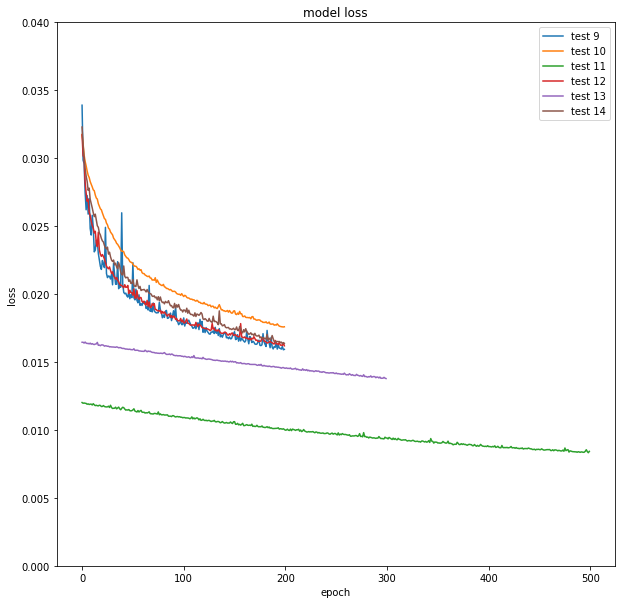

In [90]:
plt.figure(figsize=(10,10))
# plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])

# plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])

# plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])

# plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])

# plt.plot(history13.history['loss'])
plt.plot(history13.history['val_loss'])

# plt.plot(history14.history['loss'])
plt.plot(history14.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['test 9', 'test 10', 'test 11',
            'test 12', 'test 13', 'test 14'], loc='upper right')

# plt.legend(['train 9', 'test 9', 'train 10', 'test 10', 'train 11', 'test 11',
#             'train 12', 'test 12', 'train 13', 'test 13', 'train 14', 'test 14'], loc='upper right')
plt.ylim(0, .04)
plt.show()

In [16]:
# with zipfile.ZipFile('data/test.zip') as zip:
#     with zip.open('test.csv') as myZip:
#         df_test = pd.read_csv(myZip)

In [17]:
# X_test = df_test['Image'].apply(lambda image: np.fromstring(image, sep=' '))
# X_test = np.vstack(X_test)/255

In [18]:
# X2_test = X_test.reshape(-1, 96, 96, 1)

In [91]:
y_pred_cnn = cnn11.predict(X_test)

In [92]:
y_pred_cnn = y_pred_cnn*48 + 48

In [93]:
cnn_pred_df = pd.DataFrame(y_pred_cnn, columns=mixed_data_final.drop('Image', axis=1).columns)

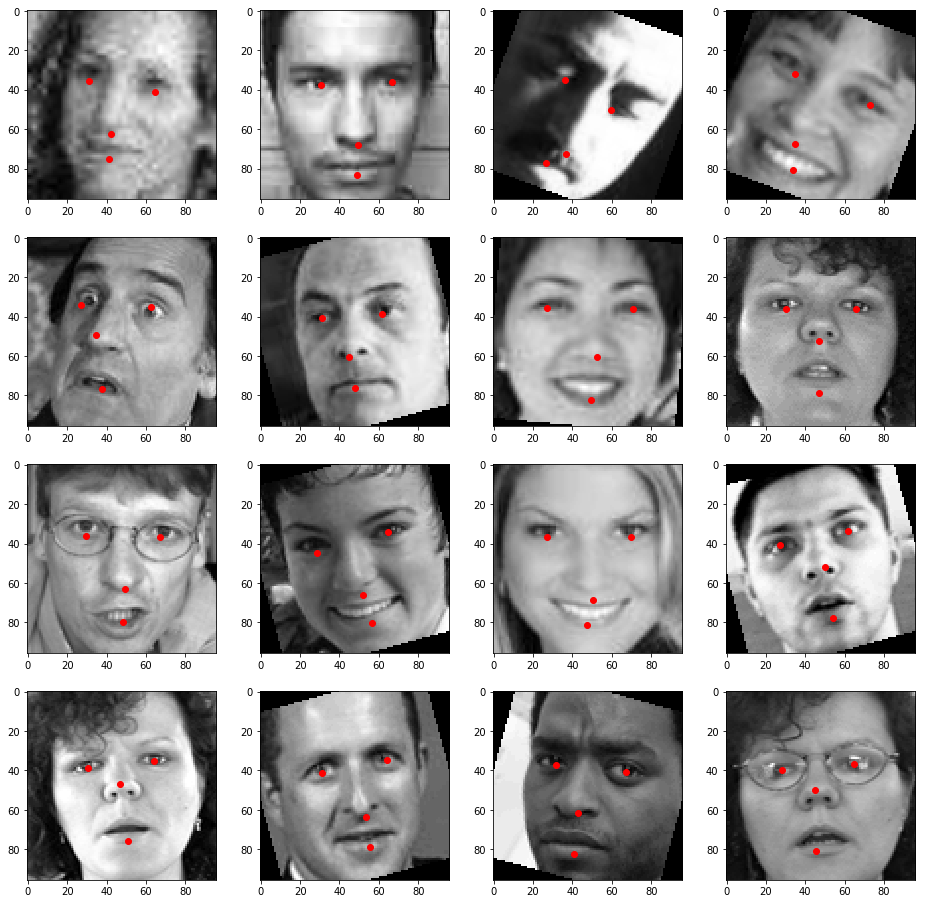

In [94]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_pred_df.iloc[i*4 + j, 2*k], cnn_pred_df.iloc[i*4 + j, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_test[i*4 + j].reshape(96, 96), cmap='gray')

In [73]:
a = mixed_data_final[mixed_data_final['nose_tip_y'] == max(mixed_data_final['nose_tip_y'])].iloc[1,:]

In [74]:
b = np.fromstring(a.Image, sep=' ')
b = np.vstack(b)/255

In [75]:
c = b.reshape(-1, 96, 96, 1)

In [95]:
single_pred = cnn11.predict(c)*48 +48
single_pred = pd.DataFrame(single_pred, columns=mixed_data_final.drop('Image', axis=1).columns)

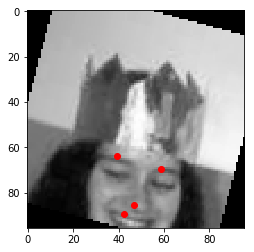

In [96]:
for k in range(4):
    plt.plot(single_pred.iloc[0, 2*k], single_pred.iloc[0, 2*k+1], c='r', marker='o')
plt.imshow(b.reshape(96, 96), cmap='gray')

In [28]:
y_train_pred_cnn = cnn5.predict(X)

In [29]:
y_train_pred_cnn = y_train_pred_cnn*48 + 48

In [30]:
cnn_train_pred_df = pd.DataFrame(y_train_pred_cnn, columns=mixed_data_final.drop('Image', axis=1).columns)

In [31]:
from random import randint

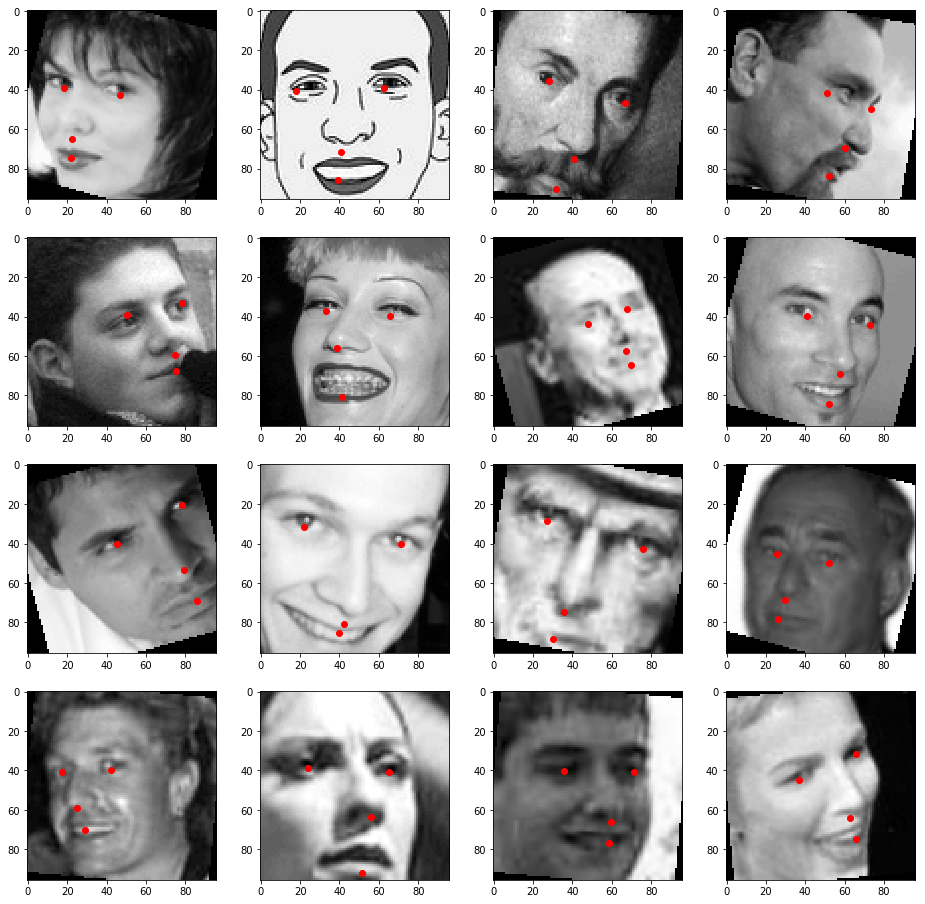

In [32]:
rndm = randint(0, 4000)
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k], cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X[i*4 + j + rndm].reshape(96, 96), cmap='gray')

In [33]:
with zipfile.ZipFile('data/training.zip') as zip:
    with zip.open('training.csv') as myZip:
        df = pd.read_csv(myZip)

In [34]:
df = df.loc[:, ['nose_tip_x', 'nose_tip_y',
                'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y',
                'left_eye_center_x', 'left_eye_center_y',
                'right_eye_center_x', 'right_eye_center_y',
                'Image']
           ].dropna()

df.shape

(7000, 9)

In [35]:
X_train = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y_train = df.drop('Image', axis=1).values

In [36]:
X_train = np.vstack(X_train) / 255
y_train = (y_train - 48) / 48

In [37]:
X2_train = X_train.reshape(-1, 96, 96, 1)

In [38]:
# cnn.evaluate(X2_train, y_train)

In [39]:
original_df_preds = cnn5.predict(X2_train)

In [40]:
original_df_preds = original_df_preds*48 + 48

In [41]:
original_df_preds = pd.DataFrame(original_df_preds, columns=mixed_data_final.drop('Image', axis=1).columns)

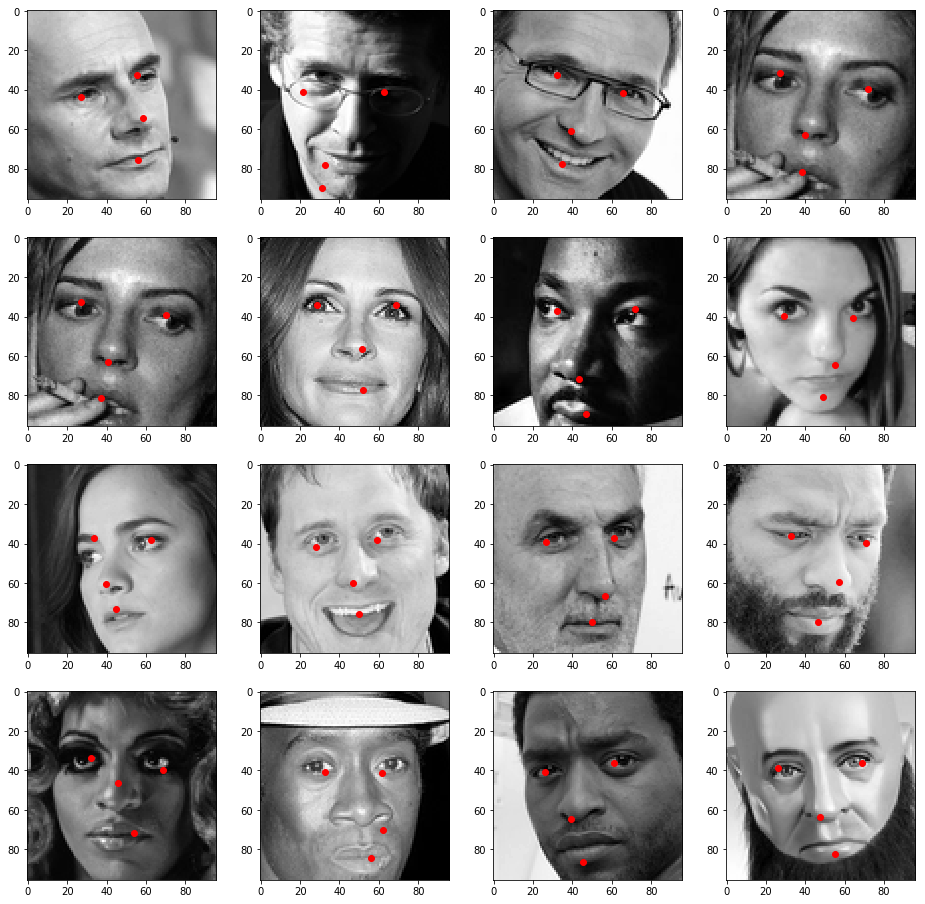

In [43]:
rndm = randint(0, 6980)
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(original_df_preds.iloc[i*4 + j + rndm, 2*k], original_df_preds.iloc[i*4 + j + rndm, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_train[i*4 + j + rndm].reshape(96, 96), cmap='gray')

In [44]:
rndm

1759

1759